In [4]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
from tensorflow.keras.utils import to_categorical

#training dataの前処理
x_train=x_train.reshape(60000,784)
x_train=x_train.astype("float32")
x_train=x_train/255
y_train=to_categorical(y_train,num_classes=10)
#testdataの前処理
x_test=x_test.reshape(10000,784)
x_test=x_test.astype("float32")
x_test=x_test/255
y_test=to_categorical(y_test,num_classes=10)

In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tensorflow.random.set_seed(seed=1)
#modelの定義
model=Sequential()
model.add(Dense(units=16,input_dim=784,activation="sigmoid"))
model.add(Dense(units=10,activation="softmax"))
model.compile(
    loss="categorical_crossentropy",optimizer="adam",
    metrics=["accuracy"],
)

In [7]:
import time
#学習
start_time=time.time()
history=model.fit(
    x_train,y_train,
    batch_size=1000,epochs=10,verbose=1,
    validation_data=(x_test,y_test)
)
score=model.evaluate(x_test,y_test,verbose=0)
calculation_time=time.time()-start_time

#result
print(f"Test loss:{score[0]:.4f}")
print(f"Test accuracy:{score[1]:.4f}")
print(f"Calculation time:{calculation_time:.2f}sec")

Epoch 1/10


60/60 [==============================] - 1s 6ms/step - loss: 2.0735 - accuracy: 0.3046 - val_loss: 1.7882 - val_accuracy: 0.5574
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 1.6278 - accuracy: 0.6474 - val_loss: 1.4583 - val_accuracy: 0.7398
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 1.3463 - accuracy: 0.7725 - val_loss: 1.2145 - val_accuracy: 0.8171
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 1.1295 - accuracy: 0.8225 - val_loss: 1.0231 - val_accuracy: 0.8484
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.9607 - accuracy: 0.8462 - val_loss: 0.8766 - val_accuracy: 0.8641
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.8317 - accuracy: 0.8608 - val_loss: 0.7656 - val_accuracy: 0.8742
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7340 - accuracy: 0.8707 - val_loss: 0.6816 - val_accuracy: 0.8808
Epoch 8/10
60/60 [=============

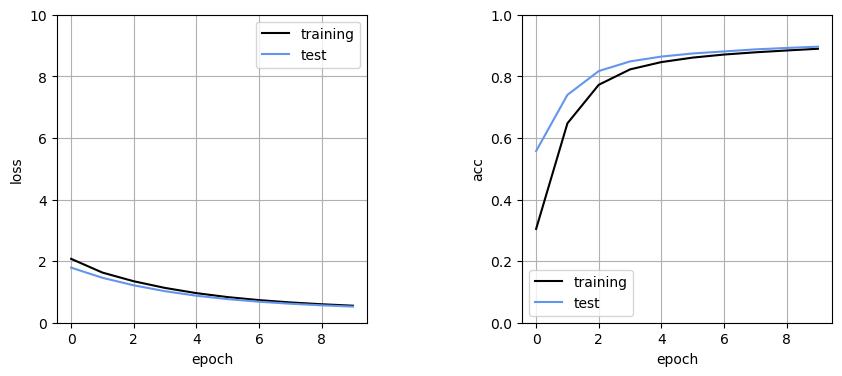

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.5)
#交差エントロピー誤差の表示
plt.subplot(1,2,1)
plt.plot(history.history["loss"],"black",label="training")
plt.plot(history.history["val_loss"],"cornflowerblue",label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(0,10)
plt.grid()
#正答率の表示
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],"black",label="training")
plt.plot(history.history["val_accuracy"],"cornflowerblue",label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.ylim(0,1)
plt.grid()
plt.show()

3/3 [==============================] - 0s 3ms/step


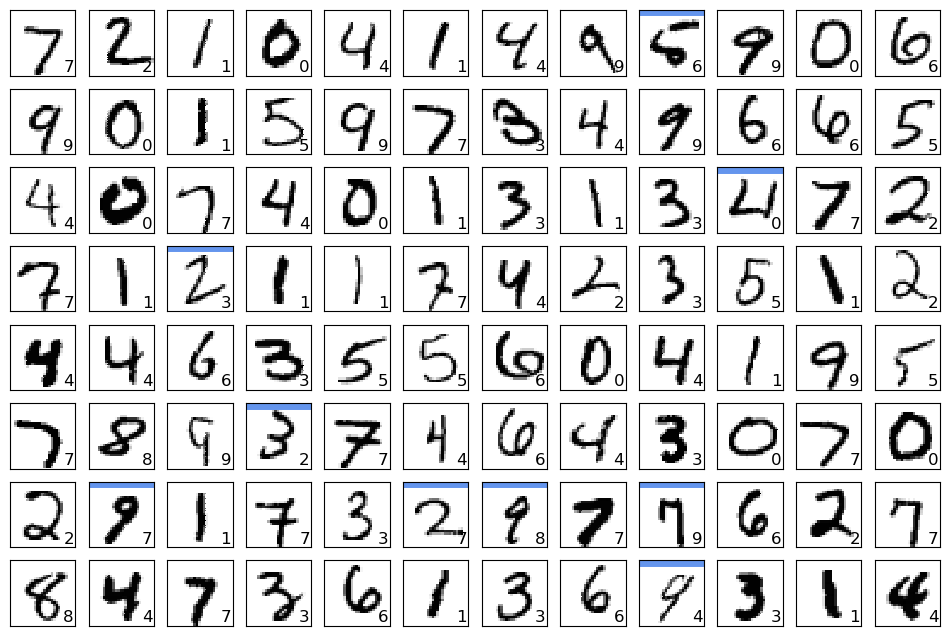

In [9]:
import numpy as np
def show_prediction():
    #testdataに対する出力を計算
    n_show=96
    y=model.predict(x_test[:n_show,:])
    #結果の描画
    plt.figure(figsize=(12,8))#表示画像の大きさ
    for i in range(n_show):
        x=x_test[i,:]
        x=x.reshape(28,28)#一文字のピクセル数
        prediction=np.argmax(y[i,:])#y[行固定,列（０～９）]
        plt.subplot(8,12,i+1)#iはゼロから始まるから！
        plt.gray()
        plt.pcolor(1-x)#入力画像の表示（白黒反転）
        plt.text(22,25.5,f"{prediction}",fontsize=12)
        if prediction!=np.argmax(y_test[i,:]):
            plt.plot(
                [0,27],[1,1],"cornflowerblue",linewidth=5
            )
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")
#main
show_prediction()
plt.show()


In [10]:
tensorflow.random.set_seed(seed=1)
#define model
model=Sequential()
model.add(Dense(units=16,input_dim=784,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",metrics=["accuracy"],
)
#学習
start_time=time.time()
history=model.fit(
    x_train,y_train,
    batch_size=1000,epochs=10,verbose=1,
    validation_data=(x_test,y_test),
)
score=model.evaluate(x_test,y_test,verbose=0)
calculation_time=time.time()-start_time
#result
print(f"Test loss:{score[0]:.4f}")
print(f"Test accuracy:{score[1]:.4f}")
print(f"Calculation time:{calculation_time:.2f}sec")

Epoch 1/10


60/60 [==============================] - 1s 7ms/step - loss: 1.6349 - accuracy: 0.4948 - val_loss: 1.0635 - val_accuracy: 0.7356
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7809 - accuracy: 0.8040 - val_loss: 0.5574 - val_accuracy: 0.8631
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4857 - accuracy: 0.8764 - val_loss: 0.4092 - val_accuracy: 0.8964
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3863 - accuracy: 0.8982 - val_loss: 0.3447 - val_accuracy: 0.9101
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3370 - accuracy: 0.9089 - val_loss: 0.3111 - val_accuracy: 0.9163
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3074 - accuracy: 0.9161 - val_loss: 0.2888 - val_accuracy: 0.9212
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.9204 - val_loss: 0.2743 - val_accuracy: 0.9237
Epoch 8/10
60/60 [=============

3/3 [==============================] - 0s 1ms/step


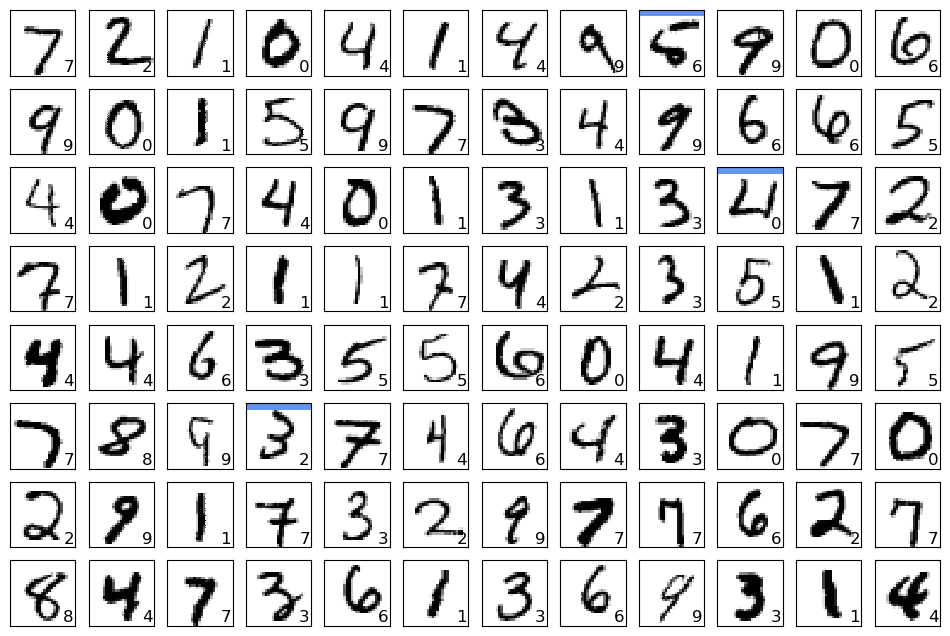

In [11]:
show_prediction()
plt.show()

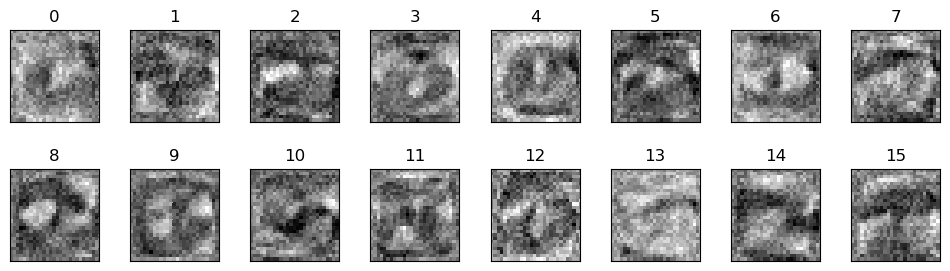

In [12]:
ws=model.layers[0].get_weights()[0]
plt.figure(figsize=(12,3))
plt.gray()
plt.subplots_adjust(wspace=0.35,hspace=0.5)
for i in range(16):
    plt.subplot(2,8,i+1)
    w=ws[:,i]
    w=w.reshape(28,28)
    plt.pcolor(-w)
    plt.title(f"{i}")
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")
plt.show()